In [1]:
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
from PIL import Image

# Clusterings results analysis

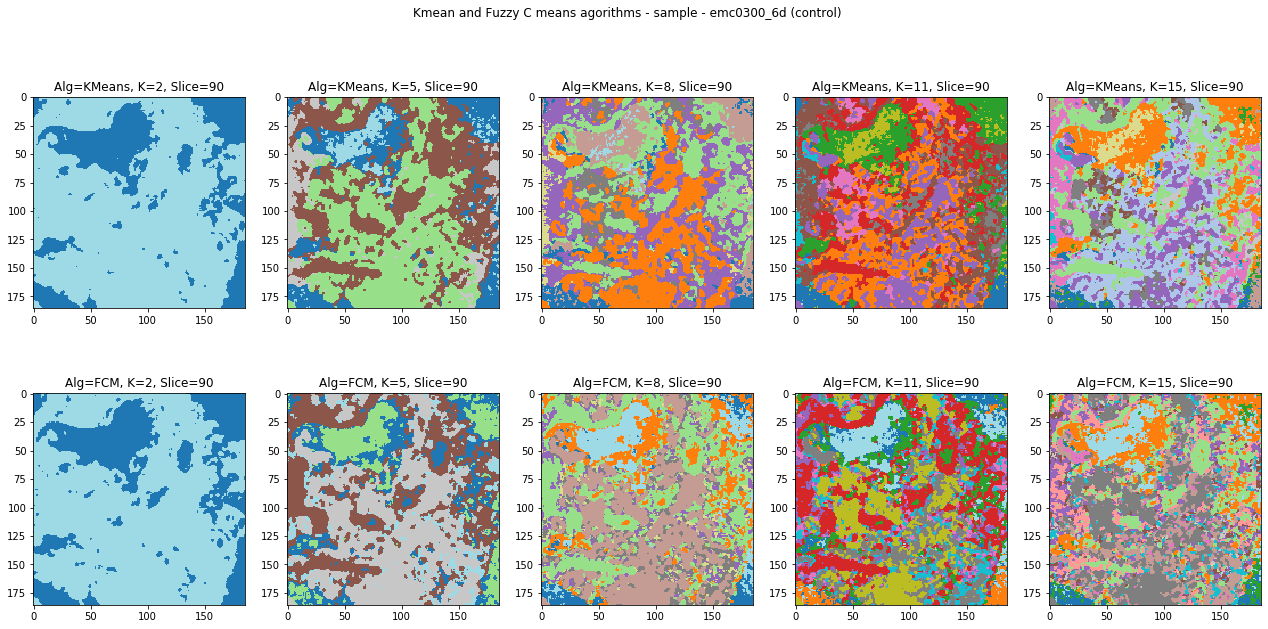

In [6]:
slc = 90
sample = 'emc0300_6d'

# compare number of K VS KMEANS VS FCM
FCM_10 = '/home/labs/bioservices/eligol/01_projects/06_pregnancy_MRI/data/13/FCM_15_means/{}/filter33/mask{}.png'.format(sample, slc)
# KM_2 = '/home/labs/bioservices/eligol/01_projects/06_pregnancy_MRI/data/8_samples_labels/KMEANS_2_means/{}/filter33/mask{}.png'.format(sample, slc)
# KM_5 = '/home/labs/bioservices/eligol/01_projects/06_pregnancy_MRI/data/8_samples_labels/KMEANS_5_means/{}/filter33/mask{}.png'.format(sample, slc)
# KM_8 = '/home/labs/bioservices/eligol/01_projects/06_pregnancy_MRI/data/8_samples_labels/KMEANS_8_means/{}/filter33/mask{}.png'.format(sample, slc)
# KM_11 = '/home/labs/bioservices/eligol/01_projects/06_pregnancy_MRI/data/8_samples_labels/KMEANS_11_means/{}/filter33/mask{}.png'.format(sample, slc)
# KM_15 = '/home/labs/bioservices/eligol/01_projects/06_pregnancy_MRI/data/8_samples_labels/KMEANS_15_means/{}/filter33/mask{}.png'.format(sample, slc)

# FCM_2 = '/home/labs/bioservices/eligol/01_projects/06_pregnancy_MRI/data/8_samples_labels/FCM_2_means/{}/filter33/mask{}.png'.format(sample, slc)
# FCM_5 = '/home/labs/bioservices/eligol/01_projects/06_pregnancy_MRI/data/8_samples_labels/FCM_5_means/{}/filter33/mask{}.png'.format(sample, slc)
# FCM_8 = '/home/labs/bioservices/eligol/01_projects/06_pregnancy_MRI/data/8_samples_labels/FCM_8_means/{}/filter33/mask{}.png'.format(sample, slc)
# FCM_11 = '/home/labs/bioservices/eligol/01_projects/06_pregnancy_MRI/data/8_samples_labels/FCM_11_means/{}/filter33/mask{}.png'.format(sample, slc)
# FCM_15 = '/home/labs/bioservices/eligol/01_projects/06_pregnancy_MRI/data/8_samples_labels/FCM_15_means/{}/filter33/mask{}.png'.format(sample, slc)

fig, ax = plt.subplots(2, 5, figsize=(22,10))

km = [2,5,8,11,15]
kM_imgs = [KM_2, KM_5, KM_8, KM_11, KM_15]
fmkM_imgs = [FCM_2, FCM_5, FCM_8, FCM_11, FCM_15]

for i, k in enumerate(km):
    im = plt.imread(kM_imgs[i])
    ax[0][i].imshow(im)
    ax[0][i].set_title("Alg=KMeans, K={}, Slice={}".format(k, slc))
    ax[0][i].grid(False)
    
    im = plt.imread(fmkM_imgs[i])
    ax[1][i].imshow(im)
    ax[1][i].set_title("Alg=FCM, K={}, Slice={}".format(k, slc))
    ax[1][i].grid(False)
    
plt.suptitle('Kmean and Fuzzy C means agorithms - sample - emc0300_6d (control)')
plt.savefig('different_algorithms_and_clusters.png')
plt.show()

In [ ]:
slc = 90
sample = 'emc0300_6d'

FCM_15 = '/home/labs/bioservices/eligol/01_projects/06_pregnancy_MRI/data/8_samples_labels/FCM_15_means/{}/filter33/mask{}.png'.format(sample, slc)

im = plt.imread(FCM_15)
plt.imshow(im)
plt.title("Alg=FCM, K={}, Slice={}".format(k, slc))
plt.grid(False)

plt.savefig('emc0300_6d_slice_90_FCM_15_clusters.png', )
plt.show()

## Histogram of clusters per sample

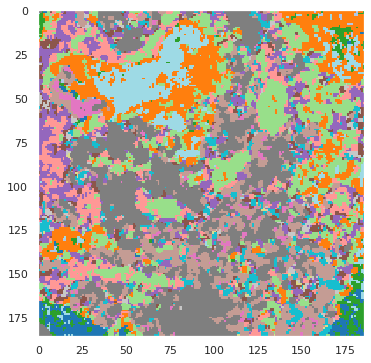

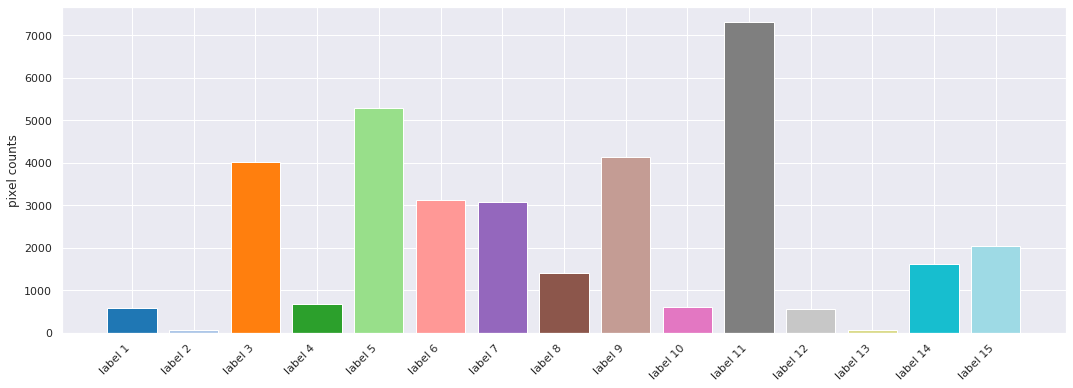

In [85]:

plt.imshow(im_t,cmap='tab10')
plt.grid(False)
plt.show()

# This is the colormap you'd like to use.
cm = plt.cm.get_cmap('tab10')

# Plot histogram.
n, bins, patches = plt.hist(im_t.ravel(),bins=15, rwidth=.8)
bin_centers = 0.5 * (bins[:-1] + bins[1:])
# bin_centers = bins

# scale values to interval [0,1]
col = bin_centers - min(bin_centers)
col /= max(col)

for c, p in zip(col, patches):
    plt.setp(p, 'facecolor', cm(c))
    
# plt.legend('label ' + str(k) for k in labels)

ticks = ['label ' + str(k+1) for k in labels]
plt.xticks(bin_centers, ticks, rotation=45,ha='right')
plt.ylabel("pixel counts")
plt.savefig('hist_emc0300_6d_slice_90_FCM_15_clusters.png')
plt.show()

## count pixels of cluster in all samples

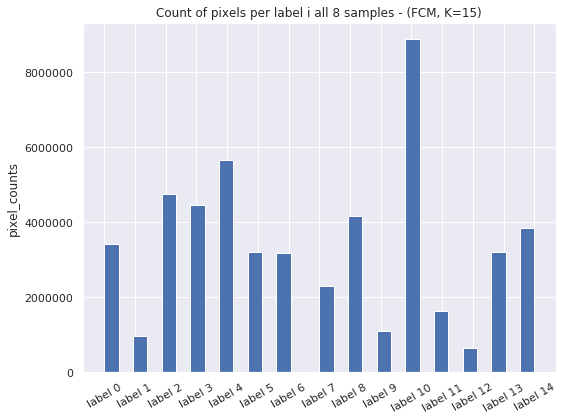

In [22]:
sns.set(rc={"figure.figsize":(8, 6)})

plt.hist(mat_to_plot.ravel(), bins = 30)
# set xticks
x1 = range(len(labels))
ticks = ['label ' + str(k) for k in labels]
plt.xticks(x1, ticks, rotation=30)
plt.ylabel("pixel_counts")
plt.title("Count of pixels per label i all 8 samples - (FCM, K=15)")
plt.tight_layout()

plt.savefig('pixel_counts_per_label.png')
plt.show()

In [38]:
# compare histograms
all_snames = ['emc0296_6d', 'emc0302_6d', 'emc0300_6d', 'hymc0168_6d', 'emc0023_6d', 'emc0130_6d', 'emc0178_6d', 'hymc0144_6d']
clusters_path = '/home/labs/bioservices/eligol/01_projects/06_pregnancy_MRI/data/8_samples_labels/FCM_15_means/labels_mask_6ch.npy'

clusters_mat = np.load(clusters_path)

mat_to_plot = clusters_mat

In [9]:
df_all_samples = pd.DataFrame()
for i in range(mat_to_plot.shape[0]):
    labels, label_counts = np.unique(mat_to_plot[i,:,:,:], return_counts=True)
    df_temp = pd.DataFrame(np.array([labels, label_counts]).T, columns = ['label', 'pixel_counts'])
    df_temp['sname'] = all_snames[i]
    df_temp['class'] = 'control' if i < 4 else 'diabetes'
    df_all_samples = pd.concat([df_all_samples, df_temp], ignore_index=True)

In [10]:
df_all_samples

,label,pixel_counts,sname,class
0,0,369204,emc0296_6d,control
1,1,56108,emc0296_6d,control
2,2,408541,emc0296_6d,control
3,3,641352,emc0296_6d,control
4,4,701451,emc0296_6d,control
...,...,...,...,...
115,10,3457682,hymc0144_6d,diabetes
116,11,122619,hymc0144_6d,diabetes
117,12,48095,hymc0144_6d,diabetes
118,13,211062,hymc0144_6d,diabetes


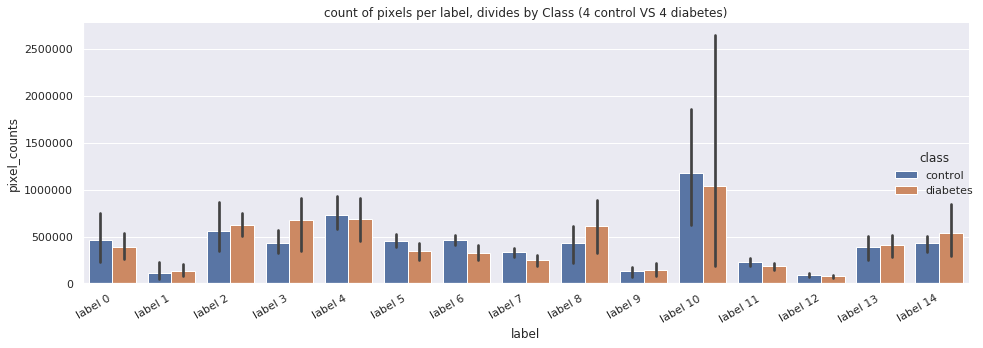

In [23]:
s = sns.catplot(x='label', y='pixel_counts', data=df_all_samples, hue="class", kind="bar", aspect=2.5)
s.set_xticklabels(['label ' + str(k) for k in labels], rotation=30, ha='right')
plt.title("count of pixels per label, divides by Class (4 control VS 4 diabetes)")
plt.tight_layout()
plt.savefig('pixel_counts_per_label_ctrl_diabete.png')
plt.show()

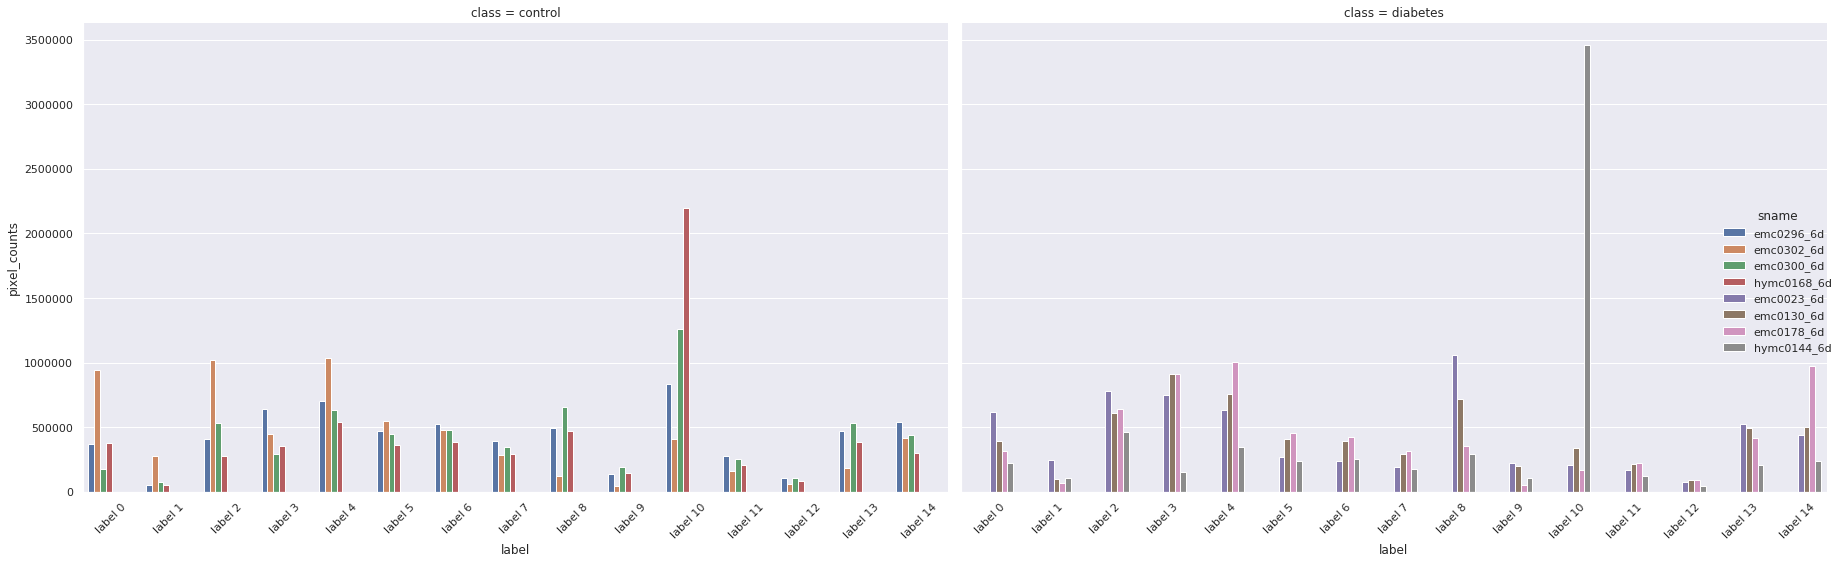

In [24]:
sns.set(rc={"figure.figsize":(28, 20)})

s = sns.catplot(x='label', y='pixel_counts', hue='sname', data=df_all_samples, col="class", kind="bar",height=8, aspect=1.5)
s.set_xticklabels(['label ' + str(k) for k in labels], rotation=45)
plt.tight_layout()

plt.savefig('pixel_counts_per_label_samples.png')
plt.show()

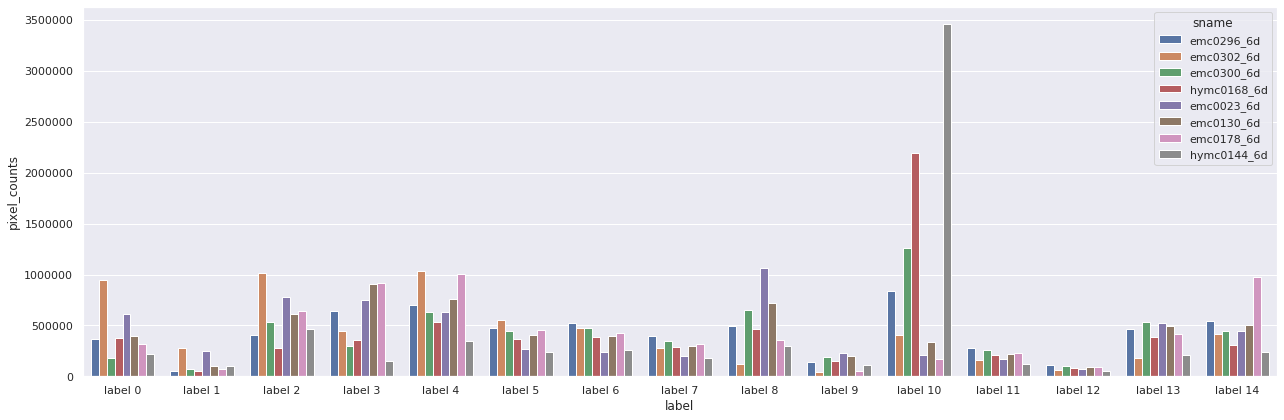

In [25]:
sns.set(rc={"figure.figsize":(18, 6)})
s = sns.barplot(x='label', y='pixel_counts', data=df_all_samples, hue='sname')
s.set_xticklabels(['label ' + str(k) for k in labels])
plt.tight_layout()

plt.show()